# Newton’s method for two equations: ellipse and circle

We solve the nonlinear system
\begin{equation}
\mathbf f(x,y)=
\begin{bmatrix}
f(x,y)\\
g(x,y)
\end{bmatrix}
=
\begin{bmatrix}
\frac{x^2}{a^2}+\frac{y^2}{b^2}-1\\[4pt]
x^2+y^2-1
\end{bmatrix}
=
\mathbf 0.
\end{equation}

Newton’s method computes updates $\Delta \mathbf x = [\Delta x,\ \Delta y]^T$ from the linear system
\begin{equation}
\mathbf J(x_k,y_k)\,\Delta\mathbf x = -\mathbf f(x_k,y_k),
\end{equation}
where $\mathbf J$ is the Jacobian of $\mathbf f$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix, plot_implicit

# Parameters (pick values that guarantee intersections)
a = 1.2
b = 0.8
# Define symbols
x, y = symbols('x y')
# Set up functions
f = x**2/a**2 + y**2/b**2 - 1         # ellipse
g = x**2 + y**2 - 1                   # circle
# Set up F vector and Jacobian        # Also set up X vector (all symbolic)
F = Matrix([f, g])                    # vector function
J = F.jacobian([x, y])                # 2x2 Jacobian
X = Matrix([x,y])

In [2]:
display(X,F,J)

Matrix([
[x],
[y]])

Matrix([
[0.694444444444444*x**2 + 1.5625*y**2 - 1],
[                         x**2 + y**2 - 1]])

Matrix([
[1.38888888888889*x, 3.125*y],
[               2*x,     2*y]])

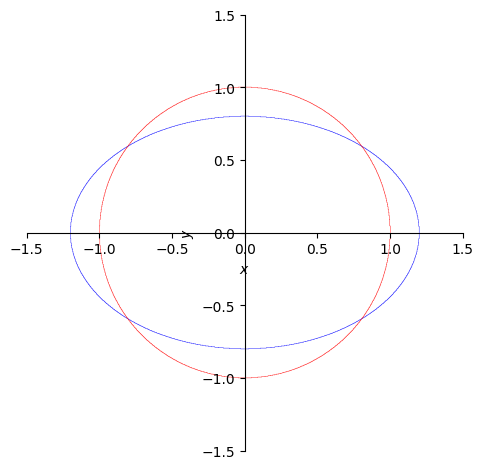

In [3]:
p1 = plot_implicit(
    f,
    (x, -1.5, 1.5),
    (y, -1.5, 1.5),
    line_color='blue',
    aspect_ratio=(1, 1),
    show=False
)
p2 = plot_implicit(
    g,
    (x, -1.5, 1.5),
    (y, -1.5, 1.5),
    line_color='red',
    aspect_ratio=(1, 1),
    show=False
)
p1.append(p2[0])
p1.show()

In [4]:
# Newton's method iterations
Xi = Matrix([[0.5],[0.5]])
niter = 8
tol = 1.0e-12
residual = []

In [5]:
for i in range(niter):
    Fi = F.subs({x: Xi[0], y: Xi[1]}).evalf()
    Ji = J.subs({x: Xi[0], y: Xi[1]}).evalf()
    dXi = -Ji.inv()*Fi
    Ri = Fi.norm()
    Xi = Xi + dXi
    residual.append(Ri)
    if Ri < tol:
        break
print(Ri)
print(Xi)

2.28878339926112e-16
Matrix([[0.804984471899924], [0.593295878967653]])


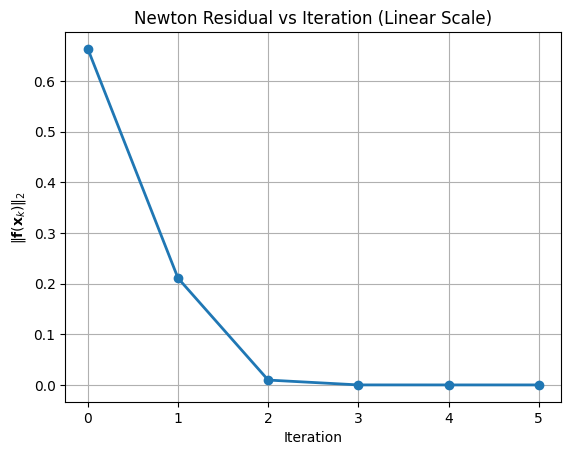

In [6]:
iters = np.arange(len(residual))
#
plt.figure()
plt.plot(iters, residual, 'o-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel(r'$\|\mathbf{f}(\mathbf{x}_k)\|_2$')
plt.title('Newton Residual vs Iteration (Linear Scale)')
plt.grid(True)
plt.show()

In [7]:
iters

array([0, 1, 2, 3, 4, 5])